### Based on the publication:
# Quantum circuit representation of Bayesian networks - Sima E. Borujeni
## Illustration Examples

### Imports

In [40]:
%load_ext autoreload
%autoreload 2

import sys
if sys.path[-1] != "..": sys.path.append("..")

from qBN.qBNMC import qBNMC

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 0 - 3-node BN: Illustrative Example

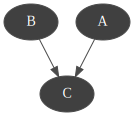

In [27]:
bn0 = gum.fastBN("A->C<-B", 2)
bn0.cpt("A")[:] = [0.2, 0.8]
bn0.cpt("B")[:] = [0.3,0.7]
bn0.cpt("C")[:] = [[[0.15, 0.85], [0.3, 0.7]], [[0.4, 0.6], [0.1, 0.9]]]
gnb.showBN(bn0, size=10)

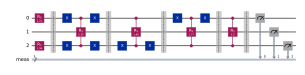

In [42]:
qbn0 = qBNMC(bn0)
qc0 = qbn0.buildCircuit(add_measure=True)
qc0.draw(output="mpl", scale=0.3, fold=40)

In [43]:
shots = 10000

ie0 = gum.LazyPropagation(bn0)
ie0.makeInference()
mc0 = gum.MonteCarloSampling(bn0)
mc0.setEpsilon(1e-20)
mc0.setMaxTime(1e20)
mc0.setMaxIter(shots)
mc0.makeInference()

runres0 = qbn0.runBN(shots=shots)

total_err_qbn0 = 0
total_err_mc0 = 0
for v_name in bn0.names():

     err_qbn = (runres0[v_name] - ie0.posterior(v_name)).toarray().max()
     err_mc = (mc0.posterior(v_name) - ie0.posterior(v_name)).toarray().max()
     total_err_qbn0 += err_qbn
     total_err_mc0 += err_mc

     gnb.sideBySide(runres0[v_name], \
                    mc0.posterior(v_name), \
                    ie0.posterior(v_name), \
                    f"{err_qbn:.5f}", \
                    f"{err_mc:.5f}", \
                    captions=["qBNMC", "MonteCarloSampling", "LazyPropagation", "Error qBN", "Error MC"])

print(f"Shots: {shots}, Total error qBN: {total_err_qbn0:.5f}, Total error MC: {total_err_mc0:.5f}")

Shots: 10000, Total error qBN: 0.00880, Total error MC: 0.00898


### 1 - 4-node BN: Oil Company Stock Price

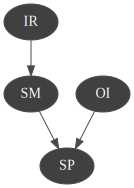

In [2]:
bn1 = gum.fastBN("IR->SM->SP<-OI", 2)
bn1.cpt("IR")[:] = [0.75, 0.25]
bn1.cpt("SM")[:] = [[0.3, 0.7], [0.8, 0.2]]
bn1.cpt("OI")[:] = [0.6,0.4]
bn1.cpt("SP")[:] = [[[0.9, 0.1], [0.5, 0.5]], [[0.4, 0.6], [0.2, 0.8]]]
gnb.showBN(bn1, size=10)

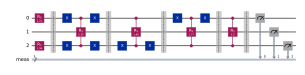

In [37]:
qbn1 = qBNMC(bn1)
qc1 = qbn1.buildCircuit(add_measure=True)
qc1.draw(output="mpl", scale=0.3, fold=40)

In [47]:
shots = 10000

ie1 = gum.LazyPropagation(bn1)
ie1.makeInference()
mc1 = gum.MonteCarloSampling(bn1)
mc1.setEpsilon(1e-20)
mc1.setMaxTime(1e20)
mc1.setMaxIter(shots)
mc1.makeInference()

runres1 = qbn1.runBN(shots=shots)

total_err_qbn1 = 0
total_err_mc1 = 0
for v_name in bn1.names():

     err_qbn = (runres1[v_name] - ie1.posterior(v_name)).toarray().max()
     err_mc = (mc1.posterior(v_name) - ie1.posterior(v_name)).toarray().max()
     total_err_qbn1 += err_qbn
     total_err_mc1 += err_mc

     gnb.sideBySide(runres1[v_name], \
                    mc1.posterior(v_name), \
                    ie1.posterior(v_name), \
                    f"{err_qbn:.5f}", \
                    f"{err_mc:.5f}", \
                    captions=["qBNMC", "MonteCarloSampling", "LazyPropagation", "Error qBN", "Error MC"])

print(f"Shots: {shots}, Total error qBN: {total_err_qbn1:.5f}, Total error MC: {total_err_mc1:.5f}")

Shots: 10000, Total error qBN: 0.00960, Total error MC: 0.00835


### 2 - 10-node BN: Liquidity Risk Assessment

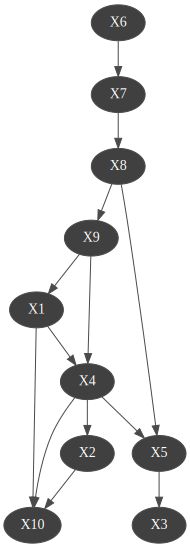

In [57]:
bn2 = gum.fastBN("X6->X7->X8->X5->X3; X8->X9->X1->X10; X9->X4<-X1; X5<-X4->X10; X4->X2->X10", 2)
bn2.cpt("X6")[:] = [0.98, 0.02]
bn2.cpt("X7")[:] = [[0.988, 0.012], [0.429, 0.571]]
bn2.cpt("X8")[:] = [[0.006,0.994], [0.875, 0.125]]
bn2.cpt("X9")[:] = [[0, 1], [0.982, 0.018]]
bn2.cpt("X1")[:] = [[0.448, 0.552], [0.067, 0.933]]
bn2.cpt("X4")[:] = [[[0.151, 0.849], [0.874, 0.126]], [[1, 0], [1, 0]]]
bn2.cpt("X2")[:] = [[0.76, 0.24], [1, 0]]
bn2.cpt("X5")[:] = [[[0, 1], [0, 1]], [[0.723, 0.277], [0.311, 0.689]]]
bn2.cpt("X3")[:] = [[1, 0], [0.949, 0.051]]
bn2.cpt("X10")[:] = [[[[0.684, 0.316], [0, 1]], [[0, 1], [0.474, 0.526]]], [[[1, 0], [0, 1]], [[0.481, 0.519], [1, 0]]]]

gnb.showBN(bn2, size=10)

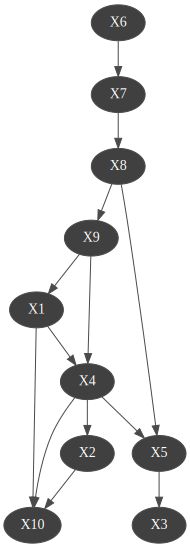

In [61]:
bn2 = gum.fastBN("X6->X7->X8->X5->X3; X8->X9->X1->X10; X9->X4<-X1; X5<-X4->X10; X4->X2->X10", 2)
bn2.cpt("X6")[:] = [0.98, 0.02]
bn2.cpt("X7")[:] = [[0.988, 0.012], [0.429, 0.571]]
bn2.cpt("X8")[:] = [[0.006,0.994], [0.875, 0.125]]
bn2.cpt("X9")[:] = [[0.000001, 0.999999], [0.982, 0.018]]
bn2.cpt("X1")[:] = [[0.448, 0.552], [0.067, 0.933]]
bn2.cpt("X4")[:] = [[[0.151, 0.849], [0.874, 0.126]], [[0.000001, 0.999999], [0.000001, 0.999999]]]
bn2.cpt("X2")[:] = [[0.76, 0.24], [0.000001, 0.999999]]
bn2.cpt("X5")[:] = [[[0.000001, 0.999999], [0.000001, 0.999999]], [[0.723, 0.277], [0.311, 0.689]]]
bn2.cpt("X3")[:] = [[0.000001, 0.999999], [0.949, 0.051]]
bn2.cpt("X10")[:] = [[[[0.684, 0.316], [0.000001, 0.999999]], [[0.000001, 0.999999], [0.474, 0.526]]], [[[0.000001, 0.999999], [0.000001, 0.999999]], [[0.481, 0.519], [0.000001, 0.999999]]]]

gnb.showBN(bn2, size=10)

In [1]:
#Problem with qBNMC where P == 0 return np.pi, works only when proba is not null

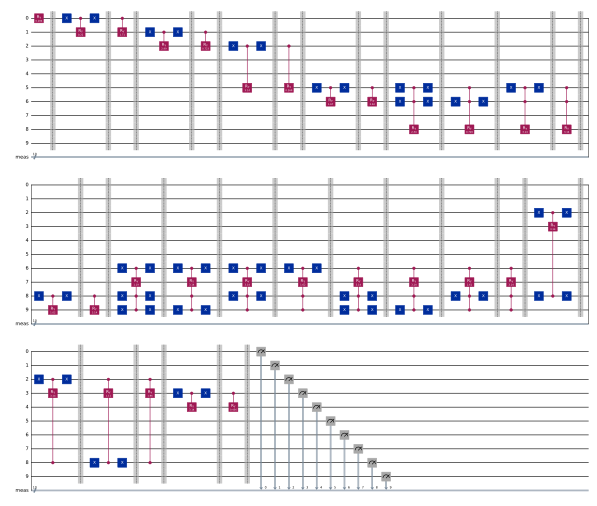

In [64]:
qbn2 = qBNMC(bn2)
qc2 = qbn2.buildCircuit(add_measure=True)
qc2.draw(output="mpl", scale=0.3, fold=40)

In [65]:
shots = 10000

ie2 = gum.LazyPropagation(bn2)
ie2.makeInference()
mc2 = gum.MonteCarloSampling(bn2)
mc2.setEpsilon(1e-20)
mc2.setMaxTime(1e20)
mc2.setMaxIter(shots)
mc2.makeInference()

runres2 = qbn2.runBN(shots=shots)

total_err_qbn2 = 0
total_err_mc2 = 0
for v_name in bn2.names():

     err_qbn = (runres2[v_name] - ie2.posterior(v_name)).toarray().max()
     err_mc = (mc2.posterior(v_name) - ie2.posterior(v_name)).toarray().max()
     total_err_qbn2 += err_qbn
     total_err_mc2 += err_mc

     gnb.sideBySide(runres2[v_name], \
                    mc2.posterior(v_name), \
                    ie2.posterior(v_name), \
                    f"{err_qbn:.5f}", \
                    f"{err_mc:.5f}", \
                    captions=["qBNMC", "MonteCarloSampling", "LazyPropagation", "Error qBN", "Error MC"])

print(f"Shots: {shots}, Total error qBN: {total_err_qbn2:.5f}, Total error MC: {total_err_mc2:.5f}")

Shots: 10000, Total error qBN: 0.09704, Total error MC: 0.03923


### 3 - 9-node Naive Bayes Classifier: Bankruptcy Prediction

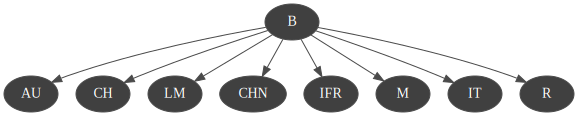

In [19]:
bn3 = gum.fastBN("B->AU; B->IT; B->CH[3]; B->LM[3]; B->M[3]; B->R[3]; B->CHN[3]; B->IFR[3]")
bn3.cpt("B")[:] = [0.5, 0.5]
bn3.cpt("AU")[:] = [[0.44, 0.56], [0.75, 0.25]]
bn3.cpt("IT")[:] = [[0.37, 0.63], [0.76, 0.24]]
bn3.cpt("CH")[:] = [[0.29, 0.63, 0.08], [0.19, 0.63, 0.18]]
bn3.cpt("M")[:] = [[0.44, 0.54, 0.02], [0.15, 0.65, 0.02]]
bn3.cpt("LM")[:] = [[0.31, 0.64, 0.05], [0.15, 0.63, 0.22]]
bn3.cpt("CHN")[:] = [[0.35, 0.53, 0.12], [0.16, 0.64, 0.2]]
bn3.cpt("IFR")[:] = [[0.09, 0.69, 0.22], [0.19, 0.75, 0.06]]
bn3.cpt("R")[:] = [[0.67, 0.28, 0.05], [0.12, 0.67, 0.21]]
gnb.showBN(bn3, size=10)

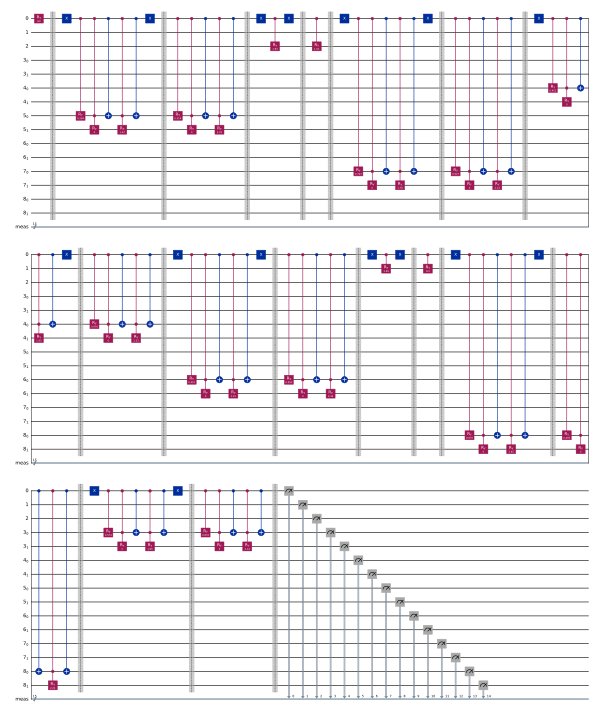

In [36]:
qbn3 = qBNMC(bn3)
qc3 = qbn3.buildCircuit(add_measure=True)
qc3.draw(output="mpl", scale=0.3, fold=40)

In [45]:
shots = 10000

ie3 = gum.LazyPropagation(bn3)
ie3.makeInference()
mc3 = gum.MonteCarloSampling(bn3)
mc3.setEpsilon(1e-20)
mc3.setMaxTime(1e20)
mc3.setMaxIter(shots)
mc3.makeInference()

runres3 = qbn3.runBN(shots=shots)

total_err_qbn3 = 0
total_err_mc3 = 0
for v_name in bn3.names():

     err_qbn = (runres3[v_name] - ie3.posterior(v_name)).toarray().max()
     err_mc = (mc3.posterior(v_name) - ie3.posterior(v_name)).toarray().max()
     total_err_qbn3 += err_qbn
     total_err_mc3 += err_mc

     gnb.sideBySide(runres3[v_name], \
                    mc3.posterior(v_name), \
                    ie3.posterior(v_name), \
                    f"{err_qbn:.5f}", \
                    f"{err_mc:.5f}", \
                    captions=["qBNMC", "MonteCarloSampling", "LazyPropagation", "Error qBN", "Error MC"])

print(f"Shots: {shots}, Total error qBN: {total_err_qbn3:.5f}, Total error MC: {total_err_mc3:.5f}")

Shots: 10000, Total error qBN: 0.12644, Total error MC: 0.22476
